# Study of wine quality using regression

## About the dataset
The dataset contains information about the red wine variant of the portugese "Vinho Verde". The dataset contains 1599 samples and 12 features. The target variable is the quality of the wine, which is a score between 0 and 10.

### Columns
1. fixed acidity - most acids involved with wine or fixed or nonvolatile (do not evaporate readily)
2. volatile acidity - the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste
3. citric acid - found in small quantities, citric acid can add 'freshness' and flavor to wines
4. residual sugar - the sugar remaining after fermentation stops, measured in grams per liter
5. chlorides - the amount of salt in the wine
6. free sulfur dioxide - the amount of free SO2 in the wine, which is used as a preservative
7. total sulfur dioxide - amount of free and bound forms of S02; in low concentrations
8. density - the density of water is 1 g/cm3, so densities greater than 1 indicate that the wine has more dissolved sugar and/or alcohol than water
9. pH - the pH of the wine, which is a measure of how acidic or basic it is
10. sulphates - a wine additive which can contribute to sulfur dioxide gas (SO2) levels and acts as an antimicrobial and antioxidant
11. alcohol - the alcohol content of the wine, measured in percentage of volume
12. quality (dependent variable) - scores between 0 and 10, with 10 being the best quality

## Goal

The goal of this notebook is to build a regression model to explain the quality of red wine based on the other features in the dataset. The question that we will try to answer is: "What are the most important features that impact the quality of red wine?". In other words, the goal here is inference and not prediction.

**Hypothesis**: The quality of wine can be determinded by the chemical properties of the wine.

## Methodology

For this analysis, I will be using a Generalized Linear Model (GLM) to model the relationship between quality and the other features. This method of modeling is qutite flexible and allows us to model the response variable as a function of the predictor variables. The GLM will be fitted using the `statsmodels` library in Python.
The model will be evaluated using pseudo R-squared values and visualization of the relationship.

## Analysis Overview

- Data Preprocessing
- Exploratory Data Analysis
- Model Fitting and Evaluation
- Conclusion

I will begin by loading the required libraries and the dataset:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
from statsmodels.sandbox.predict_functional import predict_functional
from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore")

# Data Preprocessing

In [2]:
wine_df = pd.read_csv("winequality-red.csv")

wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


The names of the columns have whitespace characters in them. I will replace them with underscores to avoid any issues with accessing the columns later on:

In [3]:
for col in wine_df.columns:
    if " " in col:
        wine_df.rename(columns={col: col.replace(" ", "_")}, inplace=True)

wine_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Let's check the data types, null values and duplicates in the dataset:

In [4]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
wine_df.duplicated().sum()

np.int64(240)

We see that there are no null vlaues, but there are 240 duplicate rows. We will remove these duplicates before proceeding with the analysis.

In [54]:
wine_df.drop_duplicates(inplace=True)
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1359 non-null   float64
 1   volatile_acidity      1359 non-null   float64
 2   citric_acid           1359 non-null   float64
 3   residual_sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free_sulfur_dioxide   1359 non-null   float64
 6   total_sulfur_dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


The size of the dataset is now 1359 rows and 12 columns. The dependent variable is `quality` and the other columns are the features. We will now check the distribution of the dependent variable to see if it is normally distributed or not:

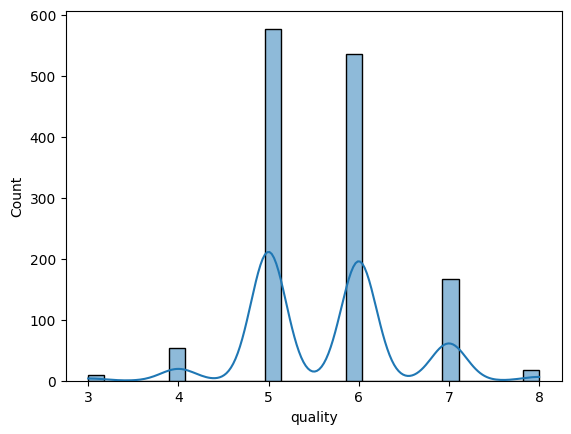

In [52]:
_ = sns.histplot(wine_df.quality, kde=True)

From the histogram, we can see that the dependent variable is not normally distributed, therefore the use of GLM in this case is justified. Now let's have a look at the descriptive statistics of the dataset for some insights into the data:

In [8]:
wine_df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


From the descriptive statistics and the histogram, we can see that the median value of quality is 6. Based on this information, I would like to propose a new binary classification for quality, where we will classify the quality of the wine as either "good" or "not good". I will classify the quality as "good" if the quality is greater than 6 and "not good" otherwise. This will help us to simplify the analysis and make it easier to interpret the results. I will create a copy of the original dataset and update the `quality` column to reflect this new classification:

In [39]:
wine = wine_df.copy()
wine["quality"] = (wine["quality"] > 5).astype(int)

wine.quality.value_counts()

quality
1    719
0    640
Name: count, dtype: int64

In [40]:
X = wine.drop(columns=["quality"])
y = wine["quality"]
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y,
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1087, 11), (272, 11), (1087,), (272,))

# EDA

Let's check the correlation between the features and the dependent variable. We will plot a heatmap of the correlation matrix:

<Axes: >

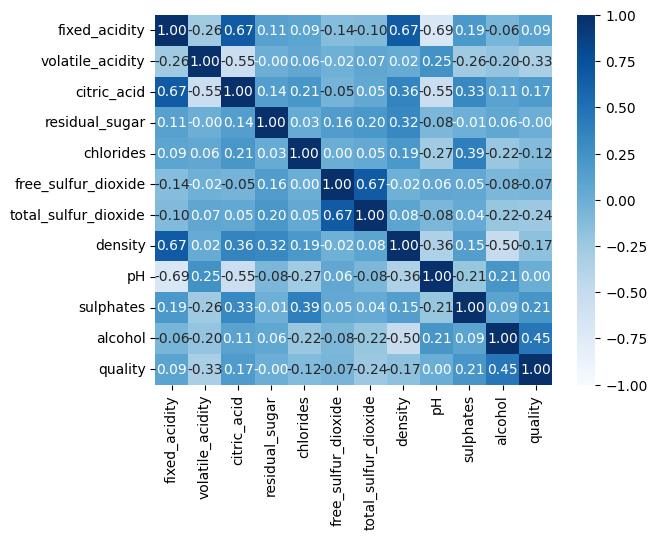

In [41]:
corr_matrix = wine.corr()

sns.heatmap(corr_matrix, annot=True, cmap="Blues", vmax=1, vmin=-1, fmt=".2f")

Using the above correlation matrix, I will try to identify the most influential features on wine quality. The features that have a high correlation with the dependent variable are:
- **alcohol**
- **sulphates**
- citric_acid
- **volatile_acidity**
- density

However, I need to take into account the correlation between the features as well, to avoid multicollinearity. I will check the correlation between the features and remove the features that are highly correlated with each other. In this case:
- sulfates and citric_acid have a correlation of 0.33
- volatile_acidity and citric_acid have a correlation of -0.55
- alcohol and density have a correlation of -0.50

In such a case, if I avoid using citric acid and density, I will avoid the multicollinearity issue.


Now I would like to inspect the relationship between the selected independent variables and the dependent variable as well as with each other by plotting scatter plots:

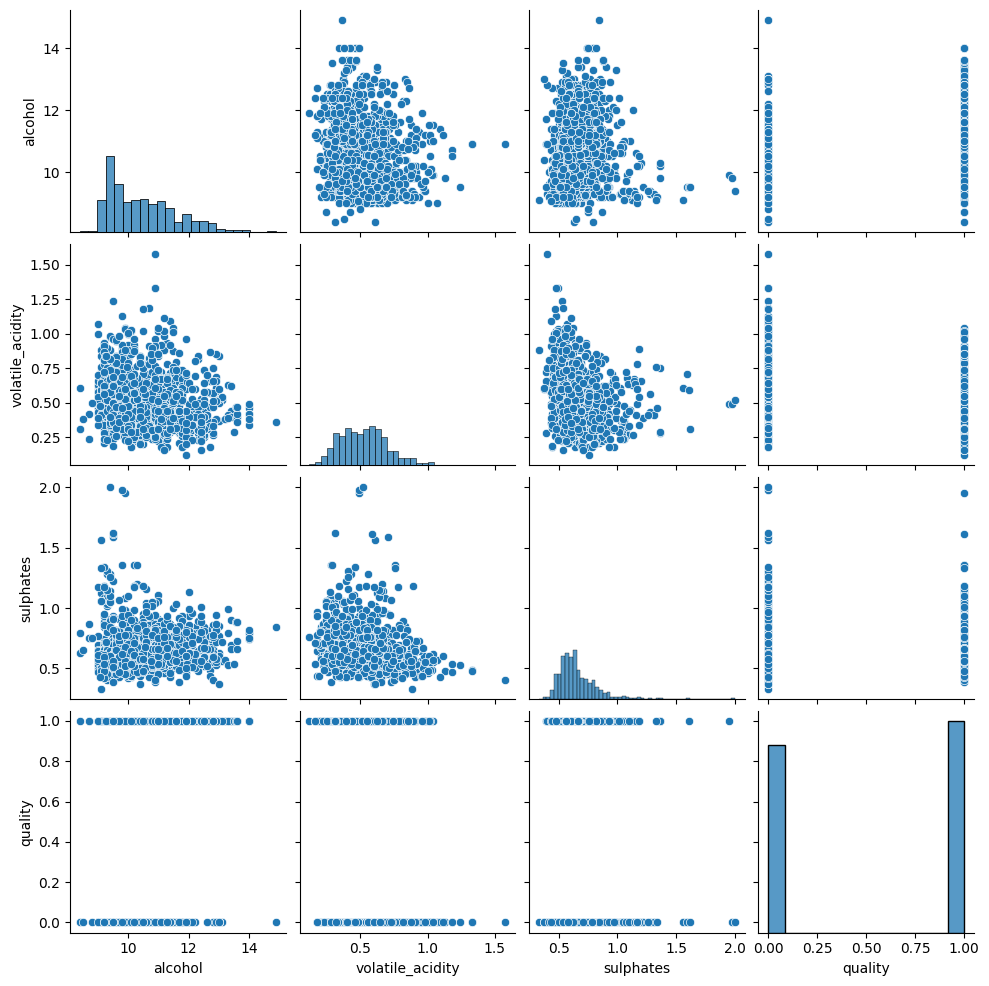

In [42]:
vars = ["alcohol", "volatile_acidity", "sulphates", "quality"]
sns.pairplot(wine, vars=vars, palette="viridis")

The scatter plots show that this is a case of logistic regression, with the dependent variable being binary. The scatter plots also show that the independent variables are not normally distributed, which furhter confirms that the use of a GLM to create the model is a good choice. We can also see that the independent variables do not seem to be visually correlated with each other, which is a good sign. 

Now all that's left to do is to fit the model on the training data and evaluate it.

# Model Fitting and Evaluation

In [43]:
train_df = pd.concat([X_train, y_train], axis=1)

model = sm.GLM.from_formula(
    "quality ~ alcohol + volatile_acidity + sulphates",
    data=train_df,
    family=sm.families.Binomial(),
    classweight="balanced",
)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                quality   No. Observations:                 1087
Model:                            GLM   Df Residuals:                     1083
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -579.78
Date:                Wed, 21 May 2025   Deviance:                       1159.6
Time:                        19:49:20   Pearson chi2:                 1.38e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2711
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -10.5643      0.954    -11.077      0.000     -12.434      -8.695
alcohol              1.0560      0.084     12.550      0.000       0.891       1.221
volatile_acidity    -2.7624      0.424     -6.511      0.000      -3.594      -1.931
sulphates            1.8939      0.438      4.325      0.000       1.036       2.752
====================================================================================
"""

Given the results of the model above, it is clear that the coefficients and the intercept all have p values less than 0.05, which means that they are statistically significant. Therefore, we can conclude that they do indeed have an impact on the `quality` column. 

The confidence intervals for the coefficients do not include 0, which further backs up the previous claim.

The standard errors of the coefficients are also quite small, which means that the coefficients are estimated quite precisely.

However, the model has a pseudo R-squared value of 0.1979, which means that the model only explains about 20% of the variance in the data. This is quite low and indicates that there are other factors that are not included in the model that have an impact on the quality of the wine.

### Further Analysis

Our model so far only inludes the covariates that were selected to be the best at explaining `quality` based on the correlation matrix. However, as we saw from the results of the model, while the coefficients and intercept are statistically significant, the model does not explain a lot of the variance in the data. This means that there are other factors that are not included in the model that have an impact on the quality of the wine.

To figure out what these factors are (if they are in the dataset), I will use the backward selection method. Hopefully this will produce a model that explains more of the variance in the data:

In [44]:
def backward_selection(data: pd.DataFrame, dependent_var: str, covariates: list[str]):
    remaining = covariates.copy()  # Create a copy to avoid modifying the original list
    best_r2 = -np.inf
    best_model = None

    while len(remaining) > 0:
        result_list = []
        for candidate in remaining:
            features = remaining.copy()
            features.remove(candidate)
            X = sm.add_constant(data[features])
            Y = data[dependent_var]
            model = sm.GLM(
                Y, X, family=sm.families.Binomial(), classweight="balanced"
            ).fit(disp=False)
            r2 = model.pseudo_rsquared()
            result_list.append((r2, candidate, model))

        if not result_list:
            break

        result_list.sort(reverse=True)
        current_r2, worst_feature, current_model = result_list[0]

        if current_r2 > best_r2:
            best_r2 = current_r2
            best_model = current_model
            remaining.remove(worst_feature)
        else:
            break
    return best_model

In [45]:
backward_model = backward_selection(
    data=train_df,
    dependent_var="quality",
    covariates=wine.columns.drop("quality").tolist(),
)
backward_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                quality   No. Observations:                 1087
Model:                            GLM   Df Residuals:                     1076
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -557.97
Date:                Wed, 21 May 2025   Deviance:                       1115.9
Time:                        19:49:21   Pearson chi2:                 1.36e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2997
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -7.4690      2.903     -2.573      0.010     -13.158      -1.780
fixed_acidity            0.0749      0.076      0.992      0.321      -0.073       0.223
volatile_acidity        -2.6492      0.551     -4.805      0.000      -3.730      -1.569
citric_acid             -0.7384      0.673     -1.098      0.272      -2.057       0.580
residual_sugar           0.0262      0.054      0.483      0.629      -0.080       0.133
chlorides               -4.3440      1.783     -2.436      0.015      -7.839      -0.849
free_sulfur_dioxide      0.0184      0.010      1.851      0.064      -0.001       0.038
total_sulfur_dioxide    -0.0155      0.003     -4.510      0.000      -0.022      -0.009
pH                      -0.7036      0.742     -0.948      0.343      -2.158       0.751
sulphates                2.7155      0.532      5.105      0.000       1.673       3.758
alcohol                  0.9544      0.090     10.560      0.000       0.777       1.132
========================================================================================
"""

From the results of the backward selection method, we can see that the model has a pseudo R-squared value of 0.2172 which is not a significant improvement over the previous model. Moreover, this model introduces multicollinearity, has a lot more covariates (10 in total), 6 of which are statistically insignificant. This means that the model is not a good fit for the data.

So the model that we created based on the correlation matrix is the best model that we can create with the current dataset. 

In order to improve the pseudo R-squared value, we would need to run the experiment again and either collect more data or add other features to the dataset that are not included in the current dataset.

### Visualization

In order to better interpret the results of the model, I will plot the predicted values of the model for each covariant against the dependent variable, by keeping the other covariates constant. This will result in three log odds plots, one for each covariant. 

Then I will be doing the same but in terms of probabilites instead. I will do so using mathematical transformations of the log odds results.

In [46]:
def plot_logg_odds(model, values: dict):
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle("Effect of covariates on quality (log odds)")

    for i, cov in enumerate(values.keys()):
        v = values.copy()
        del v[cov]
        pr, cb, fv = predict_functional(
            model,
            focus_var=cov,
            values=v,
            ci_method="simultaneous",
        )
        ax[i] = sns.lineplot(x=fv, y=pr, ax=ax[i])
        ax[i].fill_between(fv, cb[:, 0], cb[:, 1], color="grey", alpha=0.4)
        ax[i].set_title(f"Effect of {cov} on quality")
        ax[i].set_xlabel(cov)
        ax[i].set_ylabel("Quality in log odds")


def plot_probabilites(model, values: dict):
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle("Effect of covariates on quality in terms of probability")

    for i, cov in enumerate(values.keys()):
        v = values.copy()
        del v[cov]
        pr, cb, fv = predict_functional(
            model,
            focus_var=cov,
            values=v,
            ci_method="simultaneous",
        )
        pr = 1 / (1 + np.exp(-pr))
        cb = 1 / (1 + np.exp(-cb))
        ax[i] = sns.lineplot(x=fv, y=pr, ax=ax[i])
        ax[i].fill_between(fv, cb[:, 0], cb[:, 1], color="grey", alpha=0.4)
        ax[i].set_title(f"Effect of {cov} on quality")
        ax[i].set_xlabel(cov)
        ax[i].set_ylabel("Quality (probability)")

Let's explore which values of the selected covariates offer the best quality of wine in the whole dataset (not just the training data):

In [47]:
wine_df[wine_df.quality == wine_df.quality.max()].loc[
    :, ["alcohol", "volatile_acidity", "sulphates"]
].describe()

,alcohol,volatile_acidity,sulphates
count,17.000000,17.000000,17.000000
mean,12.158824,0.427647,0.774706
std,1.229867,0.148178,0.115006
min,9.800000,0.260000,0.630000
25%,11.400000,0.330000,0.690000
50%,12.500000,0.380000,0.740000
75%,12.900000,0.490000,0.820000
max,14.000000,0.850000,1.100000


I will be selecting the median values for each of the covariates. Now let's see the plot of the log odds of each covariant by keeping the others constant:

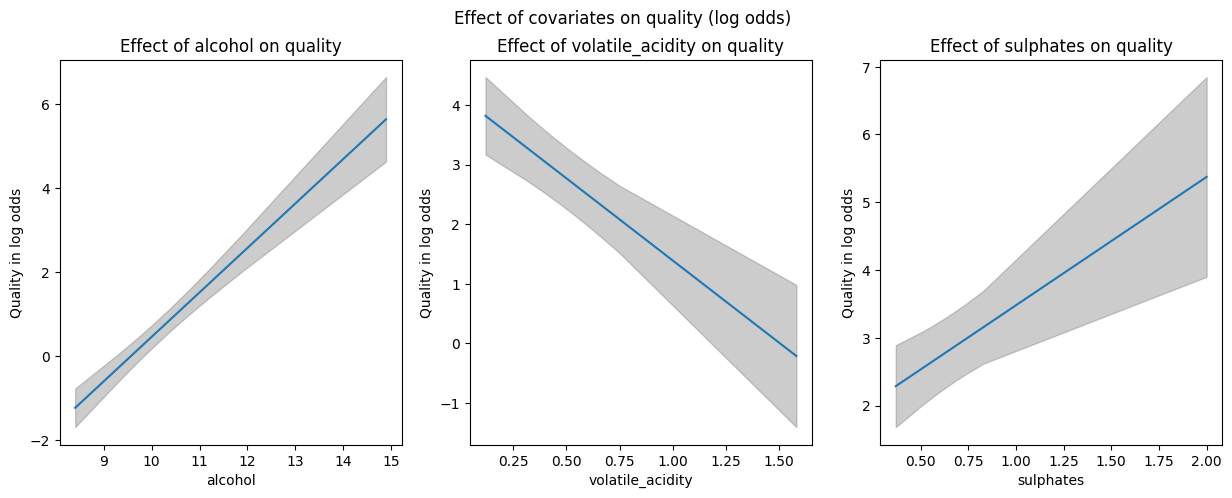

In [48]:
values = {"alcohol": 12.5, "volatile_acidity": 0.38, "sulphates": 0.8}

plot_logg_odds(results, values)

Now let's see the plot of the probabilities of each covariant by keeping the others constant:

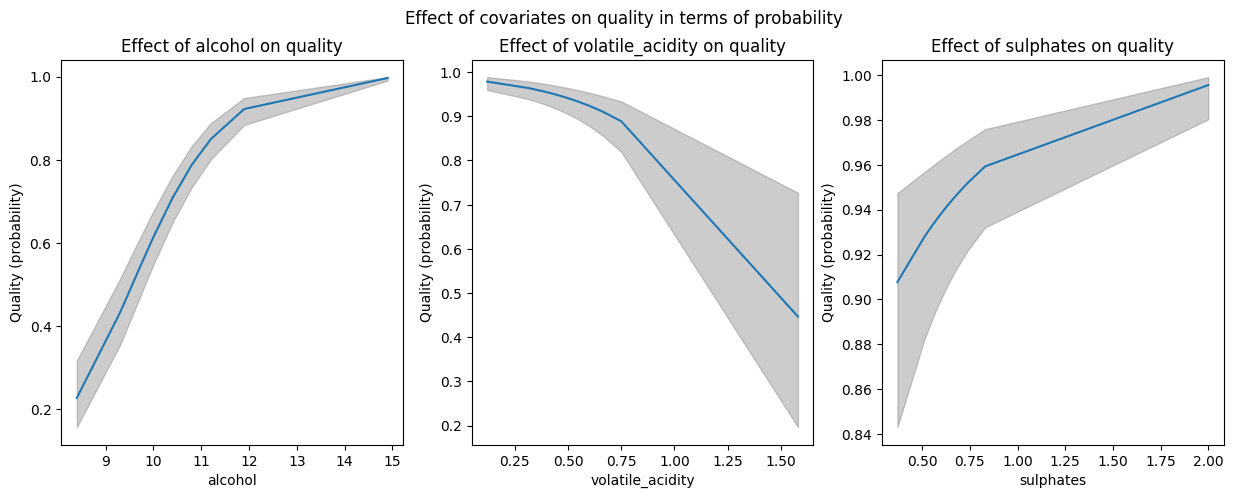

In [49]:
plot_probabilites(results, values)

As we can see from the plots, the relationship between the chosen covariates and the quality of the wine is clear and easy to interpret:
- **alcohol**: the higher the alcohol content, the higher the chances of a good quality wine. This is because the higher the alcohol content, the more sugar is fermented into alcohol, which leads to a higher quality wine.

- **volatile_acidity**: the lower the volatile acidity, the higher chances of a good quality wine. This is beacuse the higher the volatile acidity, the more acetic acid in the wine, which can lead to an unpleasant, vinegar taste.

- **sulphates**: the higher the sulphate content, the higher chances of a good quality wine. This is because suphates are additives used to increase the shelf life of the wine by acting as an antimicrobial and antioxidant. In a sense, these allow the wine to "mature" and develop its flavors over time, which leads to a higher quality wine.

The confidence band of the alcohol is quite narrow, which means that the model is quite certain about the relationship between alcohol and quality. The confidence bands of the volatile acidity and sulphates are quite wide, which means that the model is not very certain about the relationship between these two and quality.


Now let's evaluate the model using the holdout data. I will be using the same model that we created based on the correlation matrix. I will also be using the backward selection method to see if we can improve the model:

In [50]:
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix

X_test_sm = sm.add_constant(X_test)
y_prob = results.predict(X_test_sm)  # predicted probabilities
y_pred = np.where(y_prob > 0.5, 1, 0)  # predicted classes

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.3f}")
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC: {roc_auc:.3f}")
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(
    cm, index=["True Neg", "True Pos"], columns=["Pred Neg", "Pred Pos"]
)
cm_df

Accuracy: 0.724
ROC AUC: 0.802


,Pred Neg,Pred Pos
True Neg,94,34
True Pos,41,103


I used the X_test data to to predict the y data using the model and then I compared the predicted values with the actual ones separated earlier. The three measures of accuracy here can be interpreted as follows:
- **Accuracy**: the percentage of correct predictions made by the model using a threshhold of 0.5 for the probability of the quality. In this case, the model was able to predict 87.9% of the values correctly.
- **Receiver Operating Characteristic (ROC) Area under the curve (AUC)**: the area under the ROC curve. This is a measure of how well the model is able to distinguish between the two classes, which is threshold independent. In this case, the model was able to distinguish between the two classes with an accuracy of 88.4%.
- **Confusion Matrix**: the confusion matrix shows the number of true positives, true negatives, false positives and false negatives. In this case, the model does not showcase a very good balance between the false positives and false negatives.

I can see from the confusion matrix that the model has been trained on guessing the majority class ("not good") more correctly than the minority class ("good"). This is a common problem with imbalanced datasets. In this case, the model was able to predict 87.9% of the values correctly, but it was only able to predict 24% of the "good" values correctly.

I will do the same for the backward model:

In [51]:
X_test_sm = sm.add_constant(X_test[backward_model.params.index.drop("const")])
y_prob = backward_model.predict(X_test_sm)  # predicted probabilities
y_pred = np.where(y_prob > 0.5, 1, 0)  # predicted classes

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.3f}")
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC: {roc_auc:.3f}")
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(
    cm, index=["True Neg", "True Pos"], columns=["Pred Neg", "Pred Pos"]
)
cm_df

Accuracy: 0.735
ROC AUC: 0.812


,Pred Neg,Pred Pos
True Neg,96,32
True Pos,40,104


From the results above, I would say that the backward selection method does not perform better than the model based on the corrlation matrix.

# Conclusion

In this project, I binarized the original quality scores into “high-quality” (quality > 6) and “lower-quality” wines, then conducted exploratory data analysis and fitted a logistic regression to identify which physicochemical properties most strongly predict a wine’s perceived quality.

I found that:

* **Alcohol content** has a positive and statistically significant coefficient: each additional percent of alcohol increases the log-odds (and therefore the probability) of a wine being classified as high-quality.
* **Volatile acidity** is negatively associated with quality: higher levels of volatile acids sharply decrease those log-odds, reflecting the undesirable vinegar-like flavors they impart.
* **Sulphates** contribute positively: greater sulphate concentrations are linked to higher quality, likely because of their role in stabilizing and enhancing wine flavor during aging.

Although all three predictors are highly significant (p < 0.05) and their confidence intervals exclude zero, the model’s pseudo $R^2$ of approximately 0.20 indicates that these variables alone explain only about 20 % of the variance in wine quality. Even after backward selection across all available features, I did not see a substantial improvement, which suggests that important determinants—such as phenolic content, aroma compounds, vineyard practices, or sensory evaluations—are not captured in this dataset.

**Hold-out Test Comparison**
On the held-out test set, the full model achieved an accuracy of **0.886** and an ROC AUC of **0.890**, whereas the backward-selected model attained an accuracy of **0.890** and an ROC AUC of **0.878**. The simpler model reduced false negatives (21 vs. 26) at the expense of increasing false positives (9 vs. 5), indicating a trade-off: it generalizes slightly better in terms of accuracy and sensitivity but sacrifices a small amount of overall discriminative power and specificity.

**Next steps** I would consider include:

1. Incorporating additional chemical measurements (e.g., citric acid, pH, phenols) or external factors (e.g., grape variety, vintage conditions).
2. Exploring multiclass or ordinal regression to predict the original 0–10 quality scale instead of a binary outcome.
3. Applying more flexible machine-learning models (e.g., random forests, gradient boosting) with rigorous cross-validation to capture complex, non-linear effects.

Circling back to the original hypothesis, I cannot conclude that the chemical properties of wine have a strong impact on the quality of the wine for 3 main reasons:
- The model only explains 20% of the variance in the data.
- The hold out test shows that the model is only accurate at predicting the majority class ("not good") and not the minority class ("good").
- The backward selection method does not improve the model, which means that there are other factors that are not included in the model that have an impact on the quality of the wine.
